In [7]:
from utils.experiment_helper import DGP, ModelSpec, run_and_plot
from utils.models.kernel_regression import KernelRegressor
from utils.models.penalized_spline import PenalizedSplineRegressor
from utils.models.xgb_regression import XGBTreeRegressor
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## General settings

In [8]:
def kernel_factory():
    return KernelRegressor(param_value=1.0, kernel="gaussian")


def spline_factory():
    return PenalizedSplineRegressor(param_value=1.0, n_knots=30, degree=3)

def xgboost_factory():
    return XGBTreeRegressor(param_value=1.0)


model_specs = {
    "kernel": ModelSpec(
        name="kernel",
        factory=kernel_factory,
        grid=list(np.linspace(10, 320, 30))  
    ),
    "spline": ModelSpec(
        name="spline",
        factory=spline_factory,
        grid=list(np.logspace(-2, 4, 30)),        
    ),
    "xgb": ModelSpec(
        name="xgb",
        factory=xgboost_factory,
        grid=[2, 3, 4, 5, 6, 8],              
    ),
    
}

cv_schemes = ["naive", "block", "block_buffered", "walk_forward"] 

## AR

Starting Benchmark: 100 Replications...
------------------------------------------------------------
Replication 1/100 | Elapsed: 0.0s | ETA: --
Replication 2/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 3/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 4/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 5/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 6/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 7/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 8/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 9/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 10/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 11/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 12/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 13/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 14/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 15/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 16/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 17/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 18/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 19/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 20/10

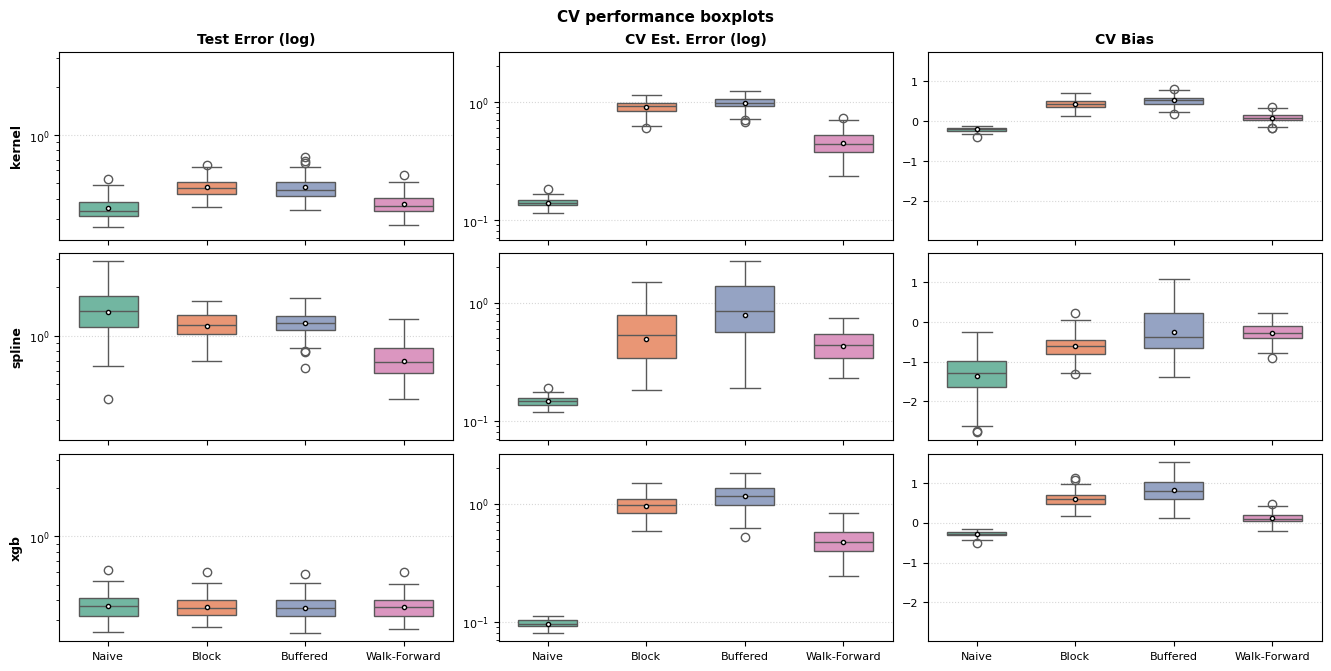

Saved fit grid to: figures/fit_local_bump_AR1_runs.pdf


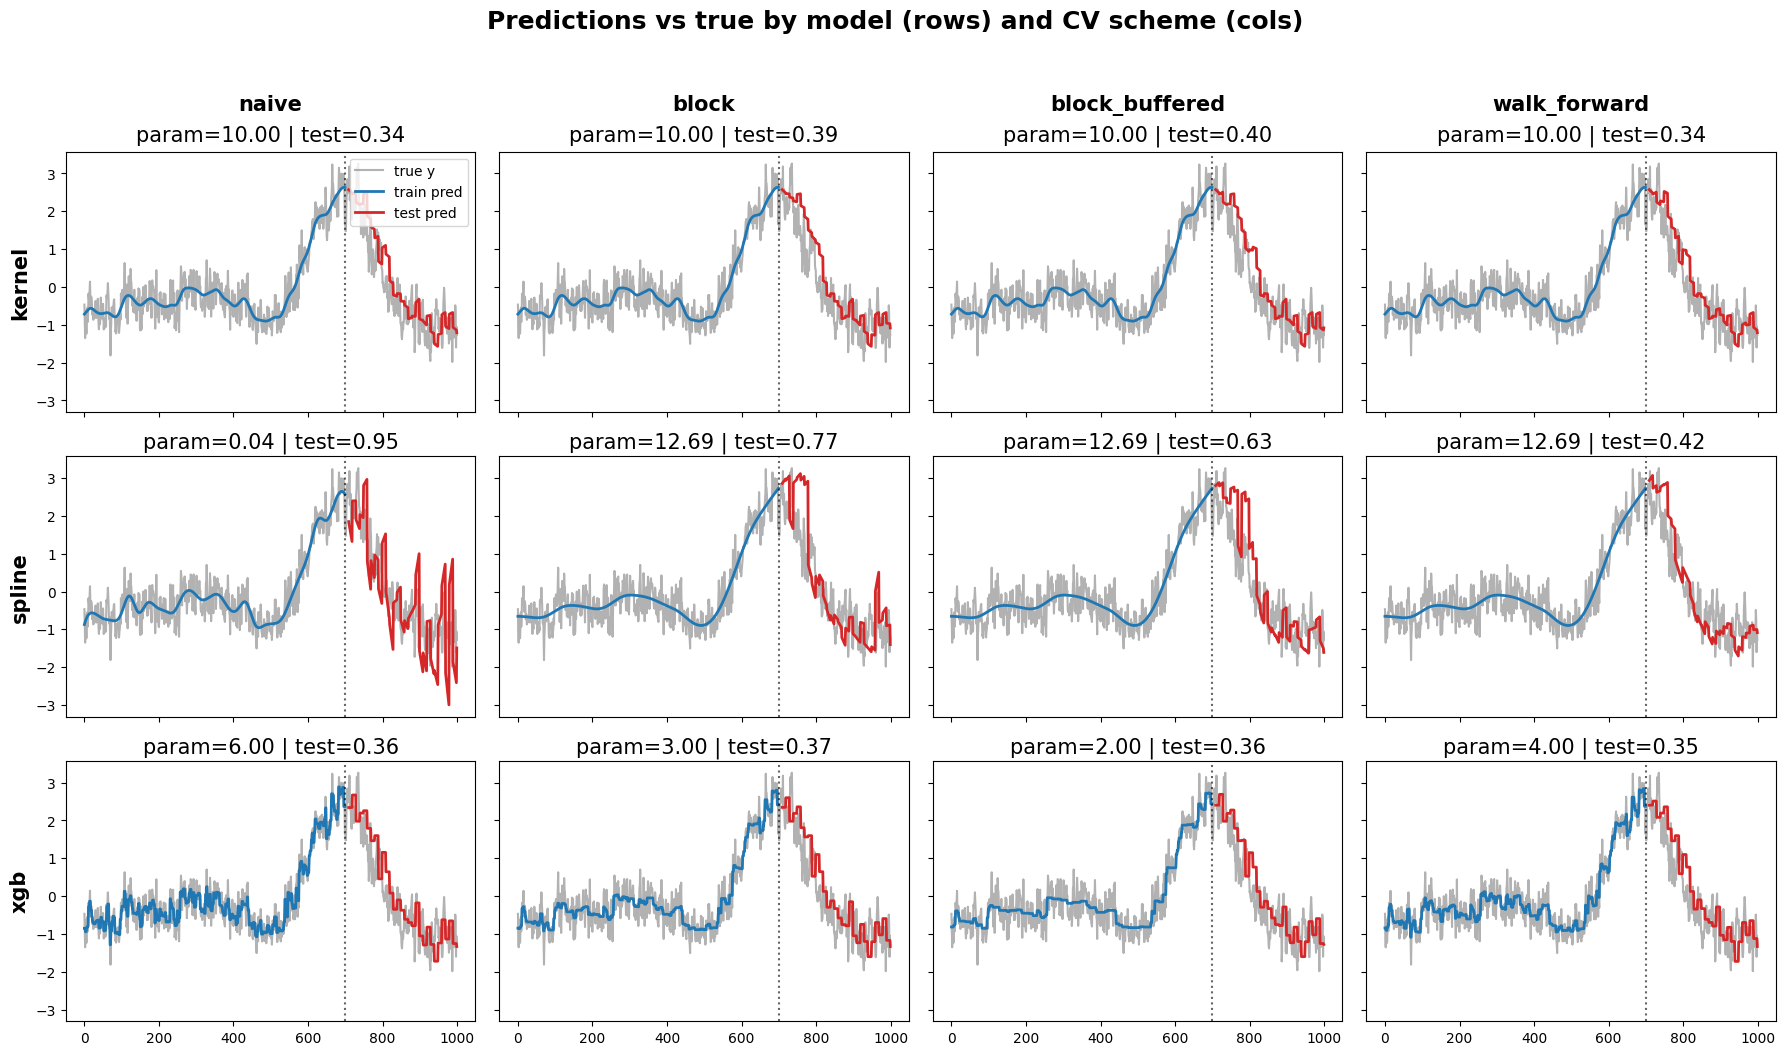

In [9]:
dgp = DGP(
    n=1000,
    f_id="local_bump",
    error_model="ar1",
    error_params={
        "rho": 0.7,
        "sigma": 0.3,
    }
)

df = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=dgp,
    replications=100,
    base_seed=321,
    k_folds=5,
    buffer_l=30,
    rolling_test=True,
    rolling_test_strategy="rolling",
    rolling_window=620,
    do_boxplots=True,
    do_fit_grid=False,
    do_train_test_plot=False,
    ahead_h = 10,
    ahead_l = 10,
    one_rep_seed=123,
    verbose=True,
    model_run_name="runs/local_bump_AR1_runs",
    save_after_each_replication=True,
    persist_format="csv",
    fit_grid_live_fallback=False,
    final_plot=True,
    boxplot_yscale="log",
    boxplot_metric_yscale={"cv_bias": "linear"},
 )

## MA

Starting Benchmark: 100 Replications...
------------------------------------------------------------
Replication 1/100 | Elapsed: 0.0s | ETA: --
Replication 2/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 3/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 4/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 5/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 6/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 7/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 8/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 9/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 10/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 11/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 12/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 13/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 14/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 15/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 16/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 17/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 18/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 19/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 20/10

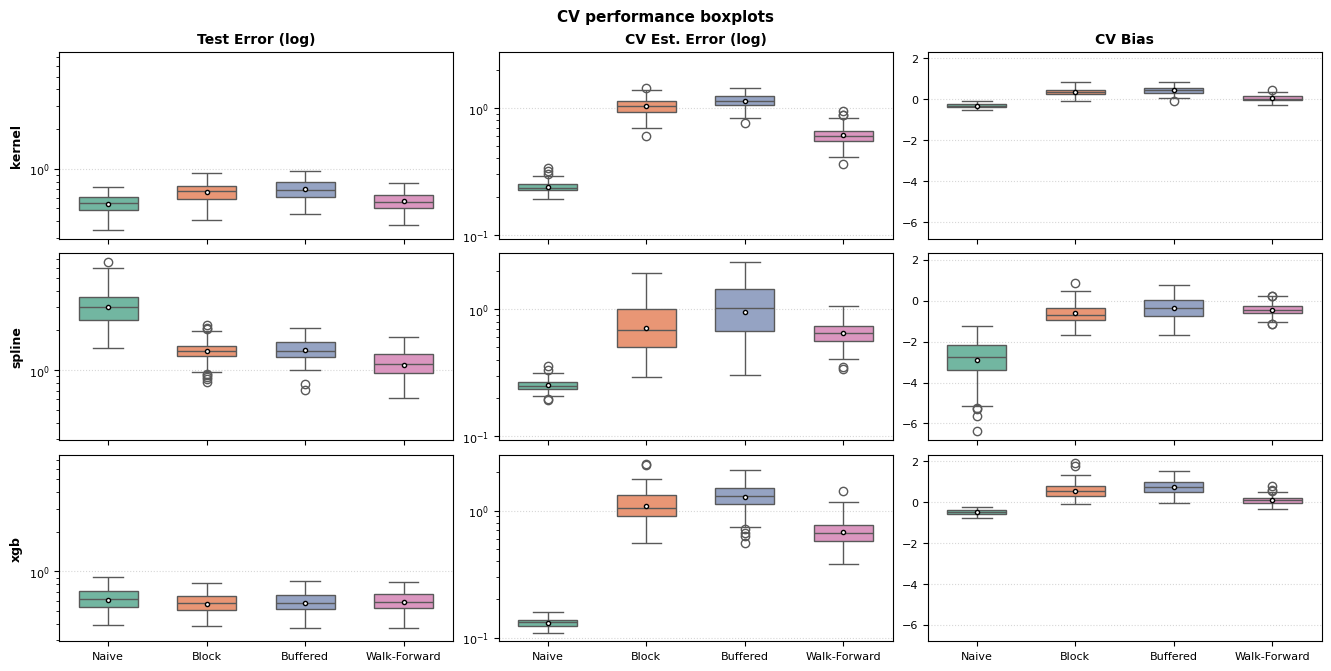

Saved fit grid to: figures/fit_local_bump_MA5_runs.pdf


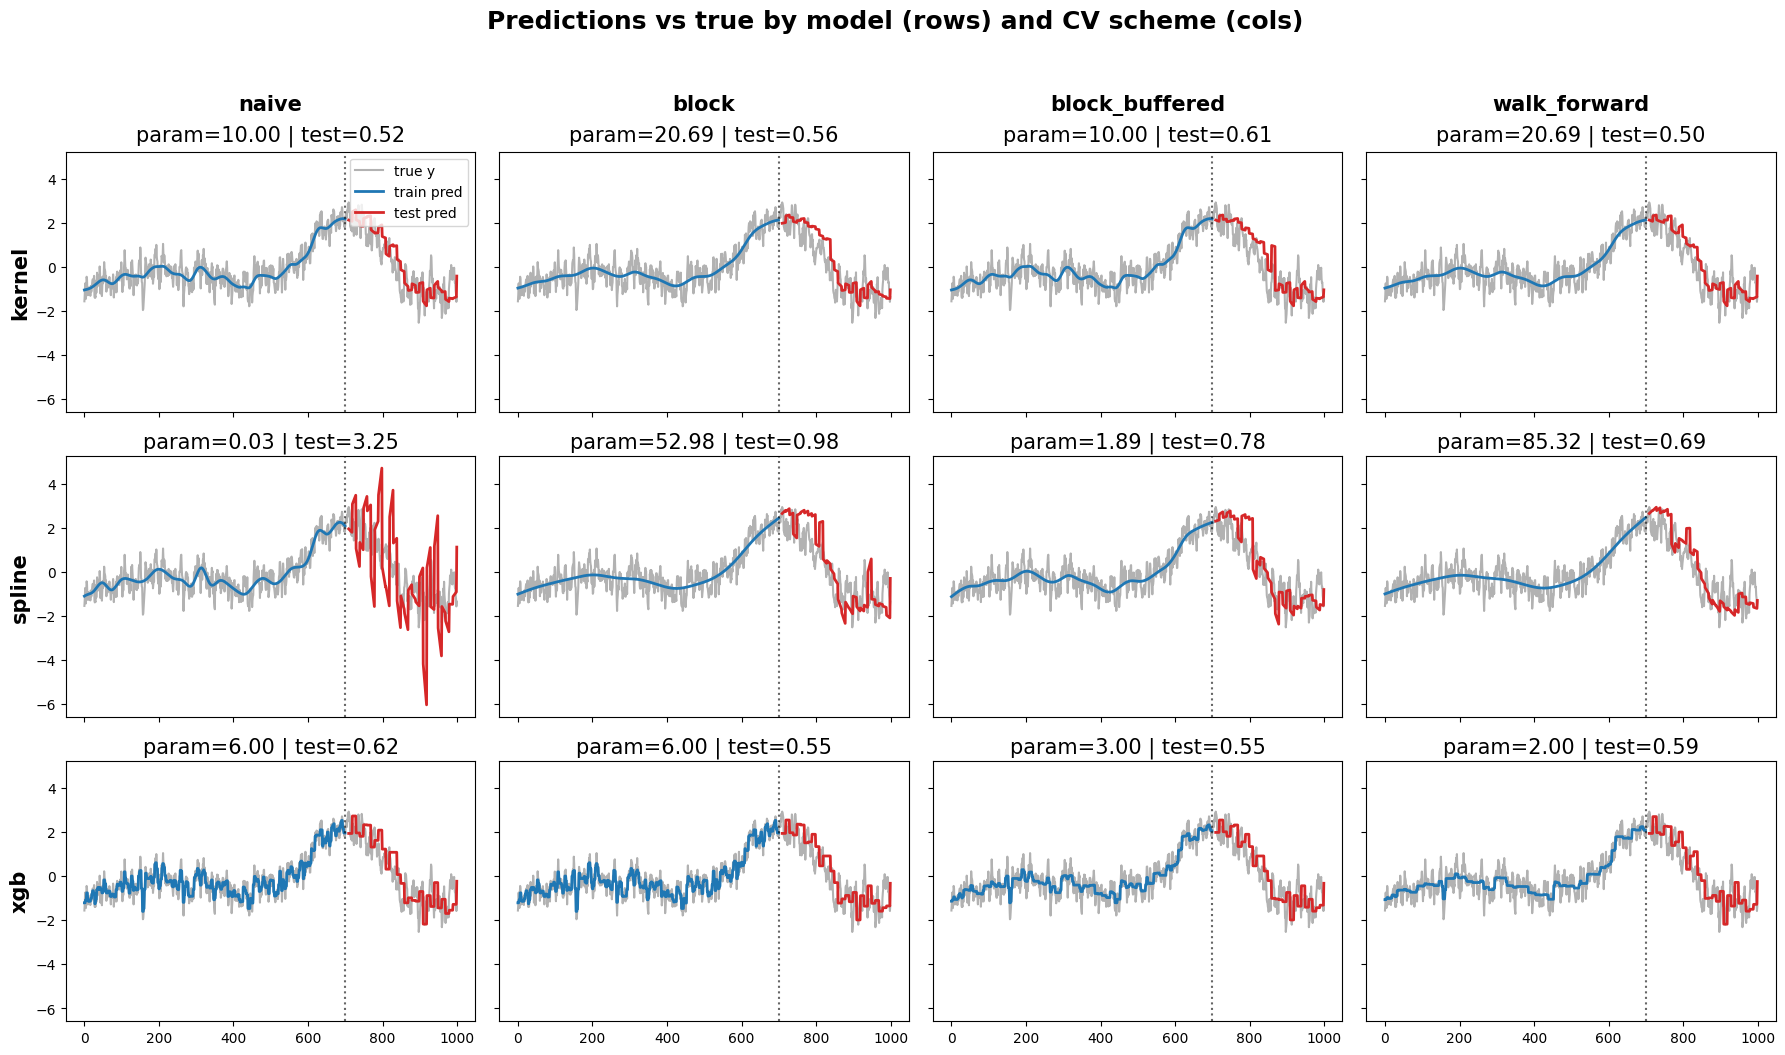

In [10]:
dgp = DGP(
    n=1000,
    f_id="local_bump",
    error_model="ma5",
    error_params={
        "theta": 0.7,
        "sigma": 0.3,
    }
)

df = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=dgp,
    replications=100,
    base_seed=321,
    k_folds=5,
    buffer_l=30,
    rolling_test=True,
    rolling_test_strategy="rolling",
    rolling_window=620,
    do_boxplots=True,
    do_fit_grid=False,
    do_train_test_plot=False,
    ahead_h = 10,
    ahead_l = 10,
    one_rep_seed=123,
    verbose=True,
    model_run_name="runs/local_bump_MA5_runs",
    save_after_each_replication=True,
    persist_format="csv",
    fit_grid_live_fallback=False,
    final_plot=True,
    boxplot_yscale="log",
    boxplot_metric_yscale={"cv_bias": "linear"},
 )

## ARIMA

Starting Benchmark: 100 Replications...
------------------------------------------------------------
Replication 1/100 | Elapsed: 0.0s | ETA: --
Replication 2/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 3/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 4/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 5/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 6/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 7/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 8/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 9/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 10/100 | Elapsed: 0.0s | ETA: 0.2s
Replication 11/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 12/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 13/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 14/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 15/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 16/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 17/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 18/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 19/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 20/10

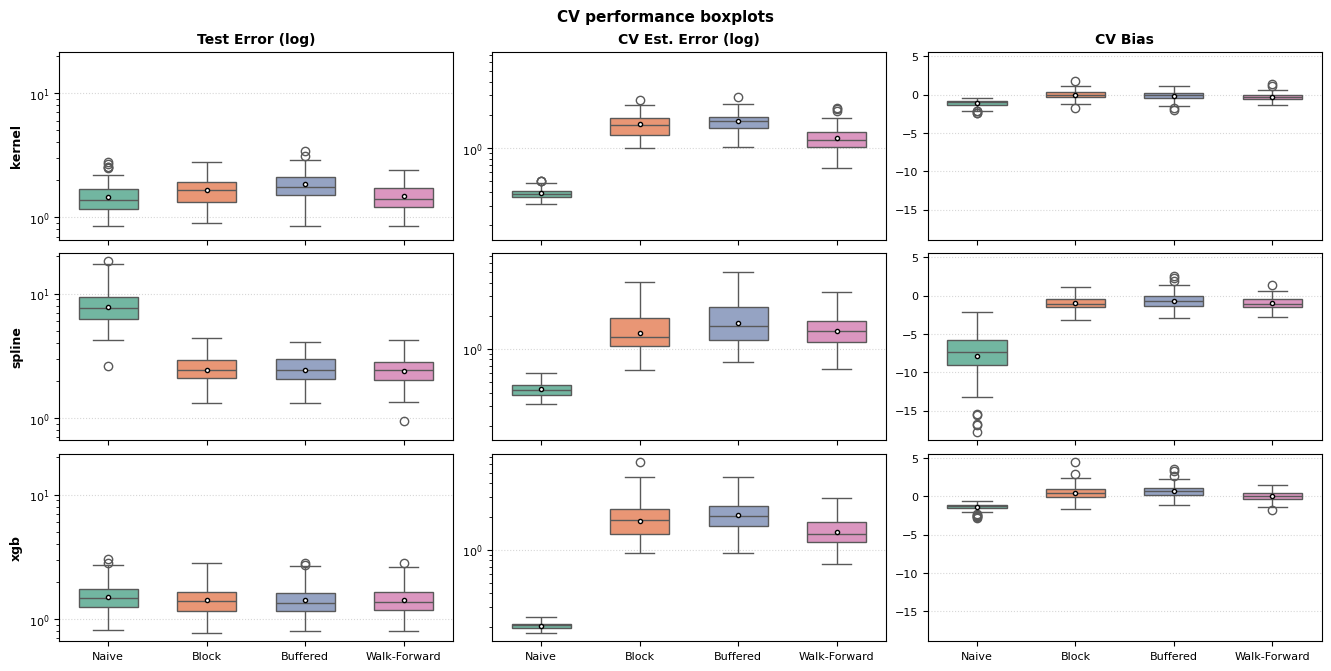

Saved fit grid to: figures/fit_local_bump_ARIMA_runs.pdf


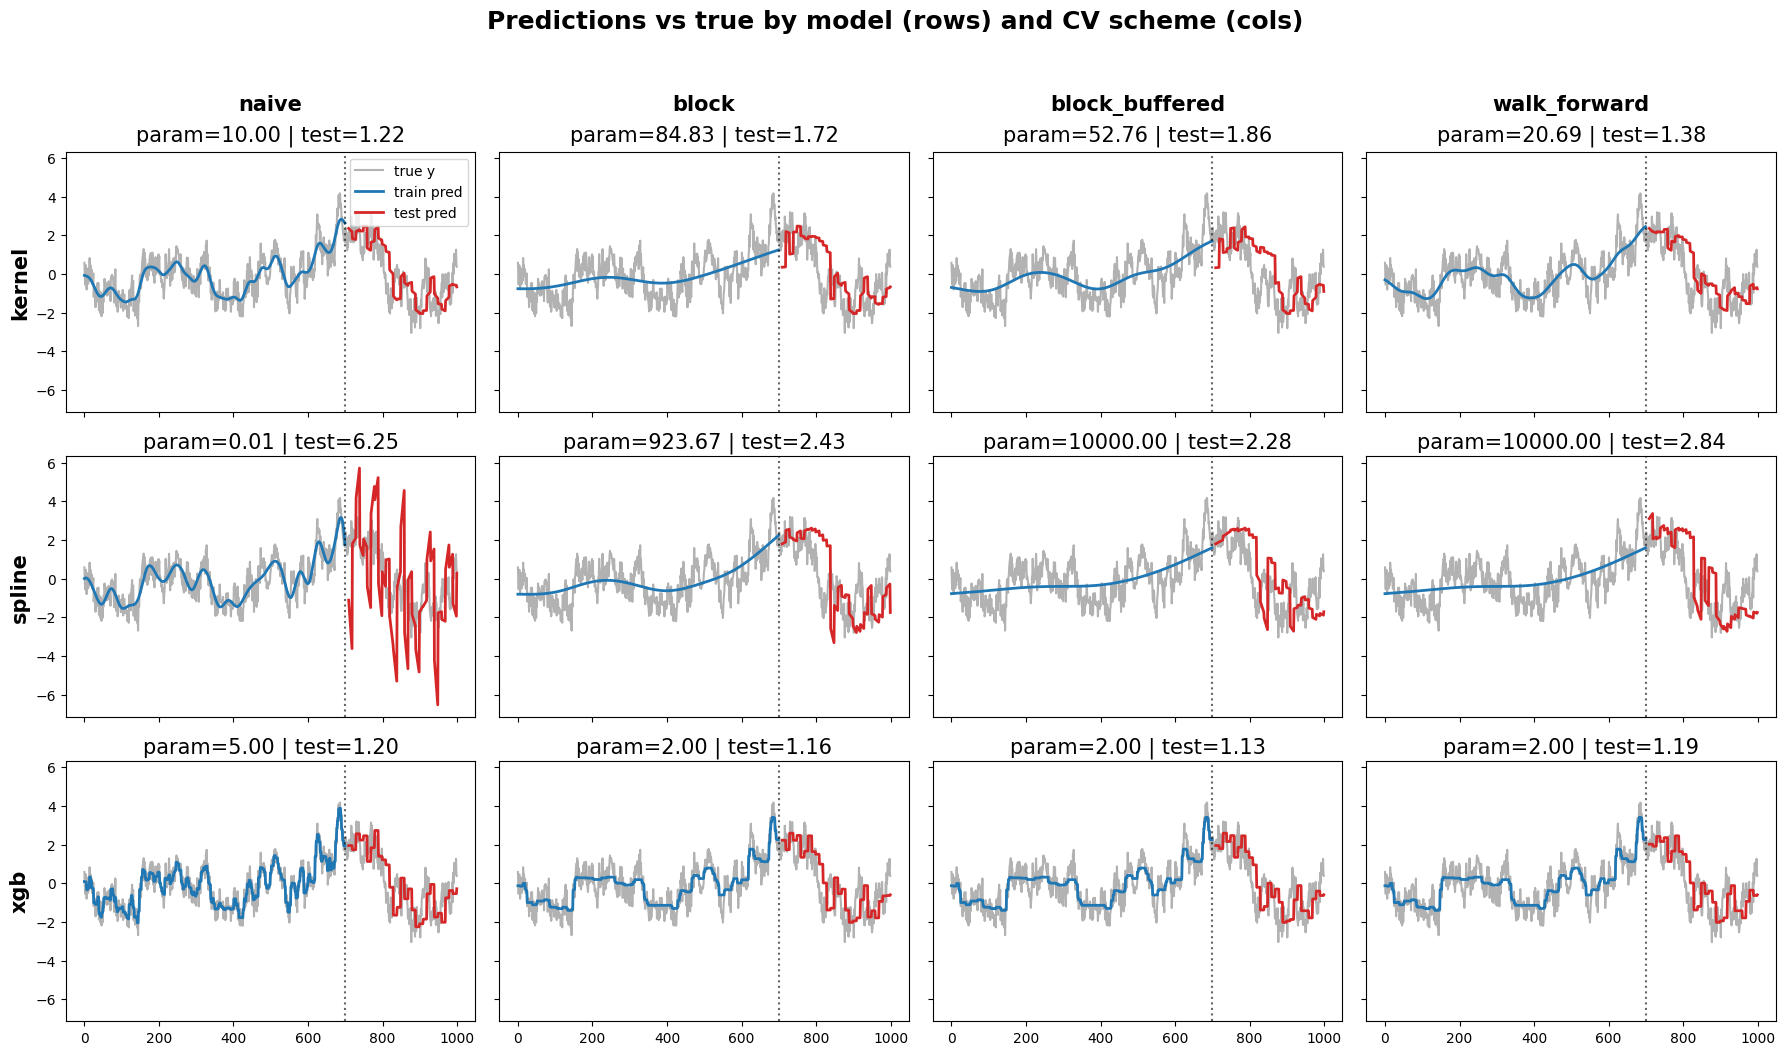

In [11]:
dgp = DGP(
    n=1000,
    f_id="local_bump",
    error_model="arima",
    error_params={
        "p": 2,
        "d": 0,
        "q": 10,
        "sigma": 0.45,
    }
)

df = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=dgp,
    replications=100,
    base_seed=321,
    k_folds=5,
    buffer_l=30,
    rolling_test=True,
    rolling_test_strategy="rolling",
    rolling_window=620,
    do_boxplots=True,
    do_fit_grid=False,
    do_train_test_plot=False,
    ahead_h = 10,
    ahead_l = 10,
    one_rep_seed=123,
    verbose=True,
    model_run_name="runs/local_bump_ARIMA_runs",
    save_after_each_replication=True,
    persist_format="csv",
    fit_grid_live_fallback=False,
    final_plot=True,
    boxplot_yscale="log",
    boxplot_metric_yscale={"cv_bias": "linear"},
 )

## Seasonal 

Starting Benchmark: 100 Replications...
------------------------------------------------------------
Replication 1/100 | Elapsed: 0.0s | ETA: --
Replication 2/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 3/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 4/100 | Elapsed: 0.0s | ETA: 0.1s
Replication 5/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 6/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 7/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 8/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 9/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 10/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 11/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 12/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 13/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 14/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 15/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 16/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 17/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 18/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 19/100 | Elapsed: 0.0s | ETA: 0.0s
Replication 20/10

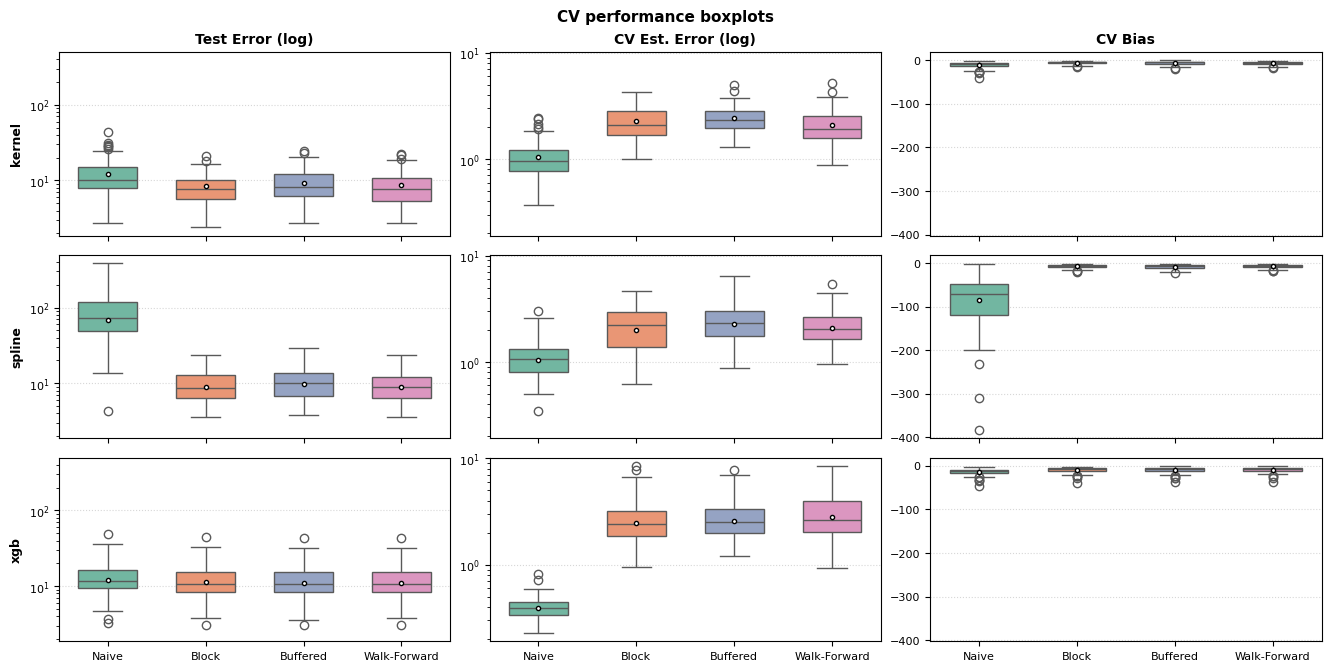

Saved fit grid to: figures/fit_local_bump_seasonal_runs.pdf


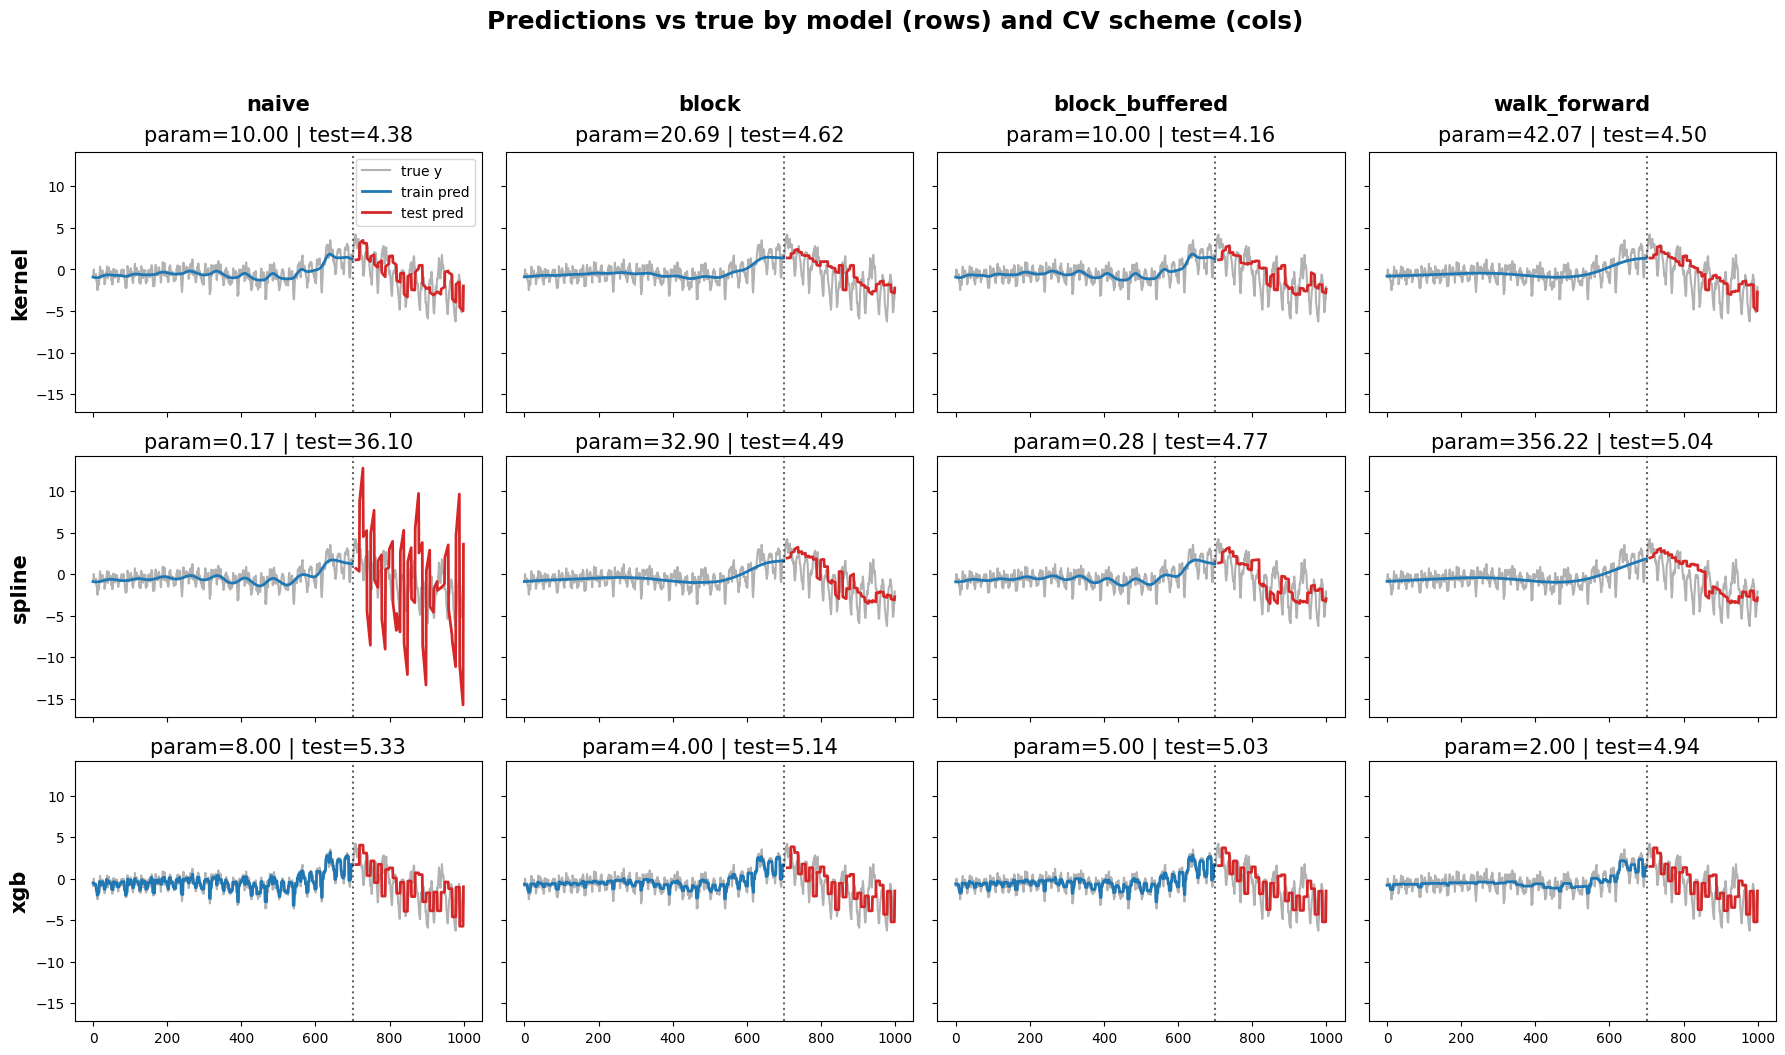

In [12]:
dgp = DGP(
    n=1000,
    f_id="local_bump",
    error_model="seasonal_ar",
    error_params={
        "season_period": 75,
        "rho1": 0.4,
        "rhoS": 0.70,
        "sigma": 0.3,
    }
)

df = run_and_plot(
    model_specs,
    cv_schemes,
    dgp=dgp,
    replications=100,
    base_seed=321,
    k_folds=5,
    buffer_l=30,
    rolling_test=True,
    rolling_test_strategy="rolling",
    rolling_window=620,
    do_boxplots=True,
    do_fit_grid=False,
    do_train_test_plot=False,
    ahead_h = 10,
    ahead_l = 10,
    one_rep_seed=123,
    verbose=True,
    model_run_name="runs/local_bump_seasonal_runs",
    save_after_each_replication=True,
    persist_format="csv",
    fit_grid_live_fallback=False,
    final_plot=True,
    boxplot_yscale="log",
    boxplot_metric_yscale={"cv_bias": "linear"},
)